## 1

Part a

In [1]:
import pandas as pd #importing the library

In [2]:
myDF = pd.read_csv('/anvil/projects/tdm/data/death_records/DeathRecords.csv') #reading the dataset

In [3]:
myDF.head() #printing the dataset

,Id,ResidentStatus,Education1989Revision,Education2003Revision,EducationReportingFlag,MonthOfDeath,Sex,AgeType,Age,AgeSubstitutionFlag,...,CauseRecode39,NumberOfEntityAxisConditions,NumberOfRecordAxisConditions,Race,BridgedRaceFlag,RaceImputationFlag,RaceRecode3,RaceRecode5,HispanicOrigin,HispanicOriginRaceRecode
0,1,1,0,2,1,1,M,1,87,0,...,24,1,1,1,0,0,1,1,100,6
1,2,1,0,2,1,1,M,1,58,0,...,21,3,3,1,0,0,1,1,100,6
2,3,1,0,7,1,1,F,1,75,0,...,28,2,2,1,0,0,1,1,100,6
3,4,1,0,6,1,1,M,1,74,0,...,22,3,3,1,0,0,1,1,100,6
4,5,1,0,3,1,1,M,1,64,0,...,21,1,1,1,0,0,1,1,100,6


In [4]:
bins = [0, 18, 25, 35, 55, 150, float('inf')] #defining the bins

In [5]:
labels = ["youth", "young adult", "adult", "middle age", "senior", "unknown"] #defining the labels

In [6]:
myDF['AgeCategory'] = pd.cut(myDF['Age'], bins=bins, labels=labels, right=True) 
#cutting the data from the Age column into the bins

In [7]:
bin_labels = pd.cut(myDF['Age'], bins=bins, right=True)
bin_counts = bin_labels.value_counts().sort_index()
print("Part a: Table with default bin labels")
print(bin_counts)
#creating the table using the bin labels

Part a: Table with default bin labels
Age
(0.0, 18.0]        36033
(18.0, 25.0]       27691
(25.0, 35.0]       49540
(35.0, 55.0]      271181
(55.0, 150.0]    2246155
(150.0, inf]         571
Name: count, dtype: int64


Part b

In [8]:
custom_bin_counts = myDF['AgeCategory'].value_counts().reindex(labels)
print(custom_bin_counts)
#using the cut function, adding the labels corresponding to the
#6 categories we put in labels

AgeCategory
youth            36033
young adult      27691
adult            49540
middle age      271181
senior         2246155
unknown            571
Name: count, dtype: int64


Part c

In [9]:
import matplotlib.pyplot as plt #library to make a bar graph
#i am using the method I used in the previous project from the website GeeksForGeeks

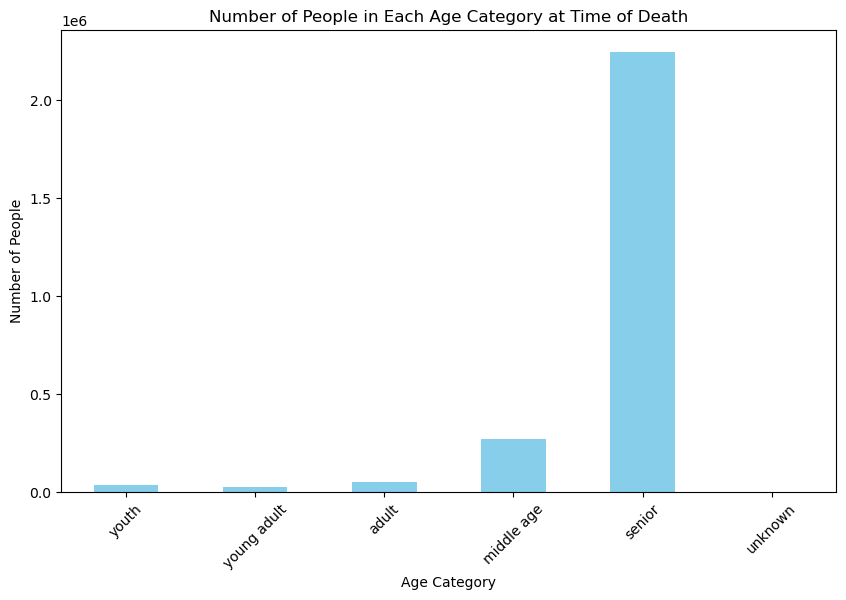

In [10]:
plt.figure(figsize=(10, 6))
custom_bin_counts.plot(kind='bar', color='skyblue')
plt.title('Number of People in Each Age Category at Time of Death')
plt.xlabel('Age Category')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.show()
#A barplot that shows the number of people in each of the 6 categories above.

## 2

In [11]:
import pandas as pd #importing the library

In [12]:
myDF = pd.read_csv('/anvil/projects/tdm/data/8451/The_Complete_Journey_2_Master/5000_transactions.csv')

In [13]:
myDF.columns = ["BASKET_NUM", "HSHD_NUM", "PURCHASE", "PRODUCT_NUM", "SPEND", "UNITS", "STORE_R", "WEEK_NUM", "YEAR"]
myDF.head() 
#to give the column heading and printing the data

,BASKET_NUM,HSHD_NUM,PURCHASE,PRODUCT_NUM,SPEND,UNITS,STORE_R,WEEK_NUM,YEAR
0,24,1809,03-JAN-16,5817389,-1.50,-1,SOUTH,1,2016
1,24,1809,03-JAN-16,5829886,-1.50,-1,SOUTH,1,2016
2,34,1253,03-JAN-16,539501,2.19,1,EAST,1,2016
3,60,1595,03-JAN-16,5260099,0.99,1,WEST,1,2016
4,60,1595,03-JAN-16,4535660,2.50,2,WEST,1,2016


In [14]:
spend_summary = myDF.groupby(['YEAR', 'STORE_R'])['SPEND'].sum().reset_index()
#group by year and store_r. summing the spend column as well. 

In [15]:
print(spend_summary) #to display the result

   YEAR  STORE_R       SPEND
0  2016  CENTRAL  4471800.64
1  2016  EAST     5829165.51
2  2016  SOUTH    3996750.91
3  2016  WEST     4754002.95
4  2017  CENTRAL  4425504.50
5  2017  EAST     5870281.35
6  2017  SOUTH    3961169.86
7  2017  WEST     4926103.59


## 3

In [16]:
import pandas as pd  #importing libraries

In [17]:
myDF = pd.read_csv('/anvil/projects/tdm/data/beer/reviews_sample.csv') #reading the dataset

In [18]:
myDF.head() #printing the dataset

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31


In [19]:
myDF['year'] = pd.to_datetime(myDF['date']).dt.year
myDF['month'] = pd.to_datetime(myDF['date']).dt.month
#to get the year and month from the date column

In [20]:
mean_scores = myDF.groupby(['year', 'month'])['score'].mean().reset_index() 
#group by year & month. and then calculating the mean score

In [21]:
print(mean_scores) #displaying the result

     year  month     score
0    1998      1  3.770000
1    1998      2  3.396667
2    1998      3  4.092000
3    1998      4  3.840000
4    1998      5  3.702000
..    ...    ...       ...
233  2018      5  3.999648
234  2018      6  4.001002
235  2018      7  3.948450
236  2018      8  3.980969
237  2018      9  3.992782

[238 rows x 3 columns]


## 4

In [22]:
import pandas as pd #library

myDF = pd.read_csv("/anvil/projects/tdm/data/election/itcont1980.txt", header=None, sep='|')

myDF.columns = ["CMTE_ID", "AMNDT_IND", "RPT_TP", "TRANSACTION_PGI", "IMAGE_NUM", "TRANSACTION_TP", "ENTITY_TP", "NAME", "CITY", "STATE", "ZIP_CODE", "EMPLOYER", "OCCUPATION", "TRANSACTION_DT", "TRANSACTION_AMT", "OTHER_ID", "TRAN_ID", "FILE_NUM", "MEMO_CD", "MEMO_TEXT", "SUB_ID"]
#load the data with the column headding

In [23]:
myDF.head() #printing the data

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00078279,A,M11,P,80031492155,22Y,NaN,"MCKENNON, K R",MIDLAND,MI,...,NaN,NaN,10031979.0,400,NaN,NaN,NaN,NaN,CONTRIBUTION REF TO INDIVIDUAL,3062020110011466469
1,C00078279,A,M11,NaN,79031415137,15,NaN,"OREFFICE, P",MIDLAND,MI,...,DOW CHEMICAL CO,NaN,10261979.0,1500,NaN,NaN,NaN,NaN,NaN,3061920110000382948
2,C00078279,A,M11,NaN,79031415137,15,NaN,"DOWNEY, J",MIDLAND,MI,...,DOW CHEMICAL CO,NaN,10261979.0,300,NaN,NaN,NaN,NaN,NaN,3061920110000382949
3,C00078279,A,M11,NaN,79031415137,15,NaN,"BLAIR, E",MIDLAND,MI,...,DOW CHEMICAL CO,NaN,10261979.0,1000,NaN,NaN,NaN,NaN,NaN,3061920110000382950
4,C00078287,A,Q1,NaN,79031231889,15,NaN,"BLANCHARD, JOHN A",CHICAGO,IL,...,NaN,NaN,3201979.0,200,NaN,NaN,NaN,NaN,NaN,3061920110000383914


Part a

In [24]:
indianaDF = myDF[myDF['STATE'] == "IN"] #creating the dataframe

In [25]:
city_counts_a = indianaDF['CITY'].value_counts().sort_values(ascending=False)
#to count the each city in indiana

In [26]:
#printing the top 41 cities in indiana using the dataframe.
print(city_counts_a.head(41))

CITY
INDIANAPOLIS      1443
MUNCIE             232
CARMEL             167
FORT WAYNE         157
EVANSVILLE         151
FT WAYNE           132
ELKHART            132
SOUTH BEND         123
INDPLS             123
LAFAYETTE           85
TERRE HAUTE         75
LAPORTE             53
ZIONSVILLE          52
GARY                47
MERRILLVILLE        46
COLUMBUS            45
KOKOMO              45
RICHMOND            43
BLOOMINGTON         38
GREENWOOD           35
CROWN POINT         35
VALPARAISO          34
ANDERSON            34
MUNICE              31
MUNSTER             30
WABASH              27
WEST LAFAYETTE      24
SYRACUSE            24
NOBLESVILLE         22
W LAFAYETTE         22
HAMMOND             22
WARSAW              21
VINCENNES           20
HOBART              17
MISHAWAKA           16
MICHIGAN CITY       16
HIGHLAND            16
CHESTERTON          15
WALKERTON           15
PLAINFIELD          15
INDIANPOLIS         15
Name: count, dtype: int64


Part b

In [27]:
#to count the each city in indiana without creating the dataframe.

In [28]:
city_counts_b = myDF[myDF['STATE'] == "IN"]['CITY'].value_counts().sort_values(ascending=False)

In [29]:
print(city_counts_b.head(41)) #printing the result in city count b

CITY
INDIANAPOLIS      1443
MUNCIE             232
CARMEL             167
FORT WAYNE         157
EVANSVILLE         151
FT WAYNE           132
ELKHART            132
SOUTH BEND         123
INDPLS             123
LAFAYETTE           85
TERRE HAUTE         75
LAPORTE             53
ZIONSVILLE          52
GARY                47
MERRILLVILLE        46
COLUMBUS            45
KOKOMO              45
RICHMOND            43
BLOOMINGTON         38
GREENWOOD           35
CROWN POINT         35
VALPARAISO          34
ANDERSON            34
MUNICE              31
MUNSTER             30
WABASH              27
WEST LAFAYETTE      24
SYRACUSE            24
NOBLESVILLE         22
W LAFAYETTE         22
HAMMOND             22
WARSAW              21
VINCENNES           20
HOBART              17
MISHAWAKA           16
MICHIGAN CITY       16
HIGHLAND            16
CHESTERTON          15
WALKERTON           15
PLAINFIELD          15
INDIANPOLIS         15
Name: count, dtype: int64


Part c

In [30]:
myDF.head(42)  #to find the one strange thing about the 41 entries 

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00078279,A,M11,P,80031492155,22Y,NaN,"MCKENNON, K R",MIDLAND,MI,...,NaN,NaN,10031979.0,400,NaN,NaN,NaN,NaN,CONTRIBUTION REF TO INDIVIDUAL,3062020110011466469
1,C00078279,A,M11,NaN,79031415137,15,NaN,"OREFFICE, P",MIDLAND,MI,...,DOW CHEMICAL CO,NaN,10261979.0,1500,NaN,NaN,NaN,NaN,NaN,3061920110000382948
2,C00078279,A,M11,NaN,79031415137,15,NaN,"DOWNEY, J",MIDLAND,MI,...,DOW CHEMICAL CO,NaN,10261979.0,300,NaN,NaN,NaN,NaN,NaN,3061920110000382949
3,C00078279,A,M11,NaN,79031415137,15,NaN,"BLAIR, E",MIDLAND,MI,...,DOW CHEMICAL CO,NaN,10261979.0,1000,NaN,NaN,NaN,NaN,NaN,3061920110000382950
4,C00078287,A,Q1,NaN,79031231889,15,NaN,"BLANCHARD, JOHN A",CHICAGO,IL,...,NaN,NaN,3201979.0,200,NaN,NaN,NaN,NaN,NaN,3061920110000383914
5,C00078287,A,Q1,NaN,79031231889,15,NaN,"CRAMER, JOHN H",CHICAGO,IL,...,NaN,NaN,2281979.0,200,NaN,NaN,NaN,NaN,NaN,3061920110000383915
6,C00078287,A,Q1,NaN,79031231889,15,NaN,"MCHUGH, KEVIN",CHICAGO,IL,...,NaN,NaN,3051979.0,200,NaN,NaN,NaN,NaN,NaN,3061920110000383916
7,C00078287,A,Q1,NaN,79031231889,15,NaN,"NOHA, EDWARD J",CHICAGO,IL,...,NaN,NaN,3121979.0,300,NaN,NaN,NaN,NaN,NaN,3061920110000383917
8,C00078287,A,Q1,NaN,79031231889,15,NaN,"RYCROFT, DONALD C",CHICAGO,IL,...,NaN,NaN,3191979.0,200,NaN,NaN,NaN,NaN,NaN,3061920110000383918
9,C00078287,A,Q1,NaN,79031231889,15,NaN,"VANDERSLICE, WILLIAM D",CHICAGO,IL,...,NaN,NaN,2271979.0,200,NaN,NaN,NaN,NaN,NaN,3061920110000383919


In [ ]:
#i used a different approach, since I couldn't figure out how to solve the part c.
# i wrorte the citites and then wrote the code. 

In [31]:
top_41_cities = myDF[myDF['STATE'] == "IN"]['CITY'].value_counts().sort_values(ascending=False).head(41)

In [32]:
print("Top 41 Cities in Indiana by Donations:")
print(top_41_cities)

Top 41 Cities in Indiana by Donations:
CITY
INDIANAPOLIS      1443
MUNCIE             232
CARMEL             167
FORT WAYNE         157
EVANSVILLE         151
FT WAYNE           132
ELKHART            132
SOUTH BEND         123
INDPLS             123
LAFAYETTE           85
TERRE HAUTE         75
LAPORTE             53
ZIONSVILLE          52
GARY                47
MERRILLVILLE        46
COLUMBUS            45
KOKOMO              45
RICHMOND            43
BLOOMINGTON         38
GREENWOOD           35
CROWN POINT         35
VALPARAISO          34
ANDERSON            34
MUNICE              31
MUNSTER             30
WABASH              27
WEST LAFAYETTE      24
SYRACUSE            24
NOBLESVILLE         22
W LAFAYETTE         22
HAMMOND             22
WARSAW              21
VINCENNES           20
HOBART              17
MISHAWAKA           16
MICHIGAN CITY       16
HIGHLAND            16
CHESTERTON          15
WALKERTON           15
PLAINFIELD          15
INDIANPOLIS         15
Name: count, 

In [ ]:
##using if else statement. used GeeksforGeeks.
#there are some spelling errors and short forms used for main cities. 

In [36]:
known_indiana_cities = {"INDIANAPOLIS", "FORT WAYNE", "EVANSVILLE", "SOUTH BEND", "CARMEL", "BLOOMINGTON", "LAFAYETTE", "TERRE HAUTE", "NOBLESVILLE", "GREENWOOD", "MISHAWAKA", "LAWRENCE", "MUNCIE", "ANDERSON", "KOKOMO", "COLUMBUS", "VALPARAISO", "FISHERS", "GREENFIELD", "NEW ALBANY", "MERRILLVILLE", "HAMMOND", "JEFFERSONVILLE", "CLARKSVILLE", "SCOTTSBURG", "SEYMOUR", "BEDFORD", "MADISON", "RICHMOND", "NEW CASTLE", "MARION", "ELKHART", "GOSHEN", "WARSAW", "PLYMOUTH", "LOGANSPORT", "PERU", "WABASH", "HUNTINGTON", "FRANKFORT", "CRAWFORDSVILLE"}

unusual_cities = top_41_cities.index[~top_41_cities.index.str.upper().isin(known_indiana_cities)]
if not unusual_cities.empty:
    print("\nUnusual or non-existent city names found:")
    print(unusual_cities)
else:
    print("\nNo unusual or non-existent city names found.")


Unusual or non-existent city names found:
Index(['FT WAYNE', 'INDPLS', 'LAPORTE', 'ZIONSVILLE', 'GARY', 'CROWN POINT',
       'MUNICE', 'MUNSTER', 'WEST LAFAYETTE', 'SYRACUSE', 'W LAFAYETTE',
       'VINCENNES', 'HOBART', 'MICHIGAN CITY', 'HIGHLAND', 'CHESTERTON',
       'WALKERTON', 'PLAINFIELD', 'INDIANPOLIS'],
      dtype='object', name='CITY')


## 5

In [2]:
import pandas as pd

In [3]:
myDF = pd.read_csv('/anvil/projects/tdm/data/flights/subset/1990.csv') #loading the data

In [4]:
myDF.head() #printing the output

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1990,1,3,3,1707.0,1630,1755.0,1723,US,29,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1990,1,4,4,1706.0,1630,1807.0,1723,US,29,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1990,1,5,5,1629.0,1630,1715.0,1723,US,29,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1990,1,6,6,1633.0,1630,1718.0,1723,US,29,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1990,1,8,1,1630.0,1630,1726.0,1723,US,29,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
bins = [-float('inf'), 0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1260, 1320, 1380, 1440]
#we have to define the bins for classification

In [6]:
# Define the labels for the bins
labels = [
    "Early or on time (<= 0 min)",
    "0 < Delay <= 60 min",
    "60 < Delay <= 120 min",
    "120 < Delay <= 180 min",
    "180 < Delay <= 240 min",
    "240 < Delay <= 300 min",
    "300 < Delay <= 360 min",
    "360 < Delay <= 420 min",
    "420 < Delay <= 480 min",
    "480 < Delay <= 540 min",
    "540 < Delay <= 600 min",
    "600 < Delay <= 660 min",
    "660 < Delay <= 720 min",
    "720 < Delay <= 780 min",
    "780 < Delay <= 840 min",
    "840 < Delay <= 900 min",
    "900 < Delay <= 960 min",
    "960 < Delay <= 1020 min",
    "1020 < Delay <= 1080 min",
    "1080 < Delay <= 1140 min",
    "1140 < Delay <= 1200 min",
    "1200 < Delay <= 1260 min",
    "1260 < Delay <= 1320 min",
    "1320 < Delay <= 1380 min",
    "1380 < Delay <= 1440 min"
]

In [7]:
myDF['DelayCategory'] = pd.cut(myDF['DepDelay'], bins=bins, labels=labels, right=True)
#classifying the flights into bins

In [9]:
delay_counts = myDF['DelayCategory'].value_counts(dropna=False)
#to count the number of flights in each category 

In [10]:
delay_counts = delay_counts.reindex(labels + [pd.NA], fill_value=0)
#we can sort the results by bin order we had in the beginning

In [11]:
print("Number of flights in each delay category:")
print(delay_counts)
#using the print function to see the results.

Number of flights in each delay category:
DelayCategory
Early or on time (<= 0 min)    2966433
0 < Delay <= 60 min            2111783
60 < Delay <= 120 min           104240
120 < Delay <= 180 min           24000
180 < Delay <= 240 min            7517
240 < Delay <= 300 min            2630
300 < Delay <= 360 min            1001
360 < Delay <= 420 min             366
420 < Delay <= 480 min             125
480 < Delay <= 540 min              65
540 < Delay <= 600 min              35
600 < Delay <= 660 min              19
660 < Delay <= 720 min              24
720 < Delay <= 780 min              20
780 < Delay <= 840 min              24
840 < Delay <= 900 min              13
900 < Delay <= 960 min               8
960 < Delay <= 1020 min              6
1020 < Delay <= 1080 min             1
1080 < Delay <= 1140 min             4
1140 < Delay <= 1200 min             3
1200 < Delay <= 1260 min             3
1260 < Delay <= 1320 min            11
1320 < Delay <= 1380 min            28
1380 < D